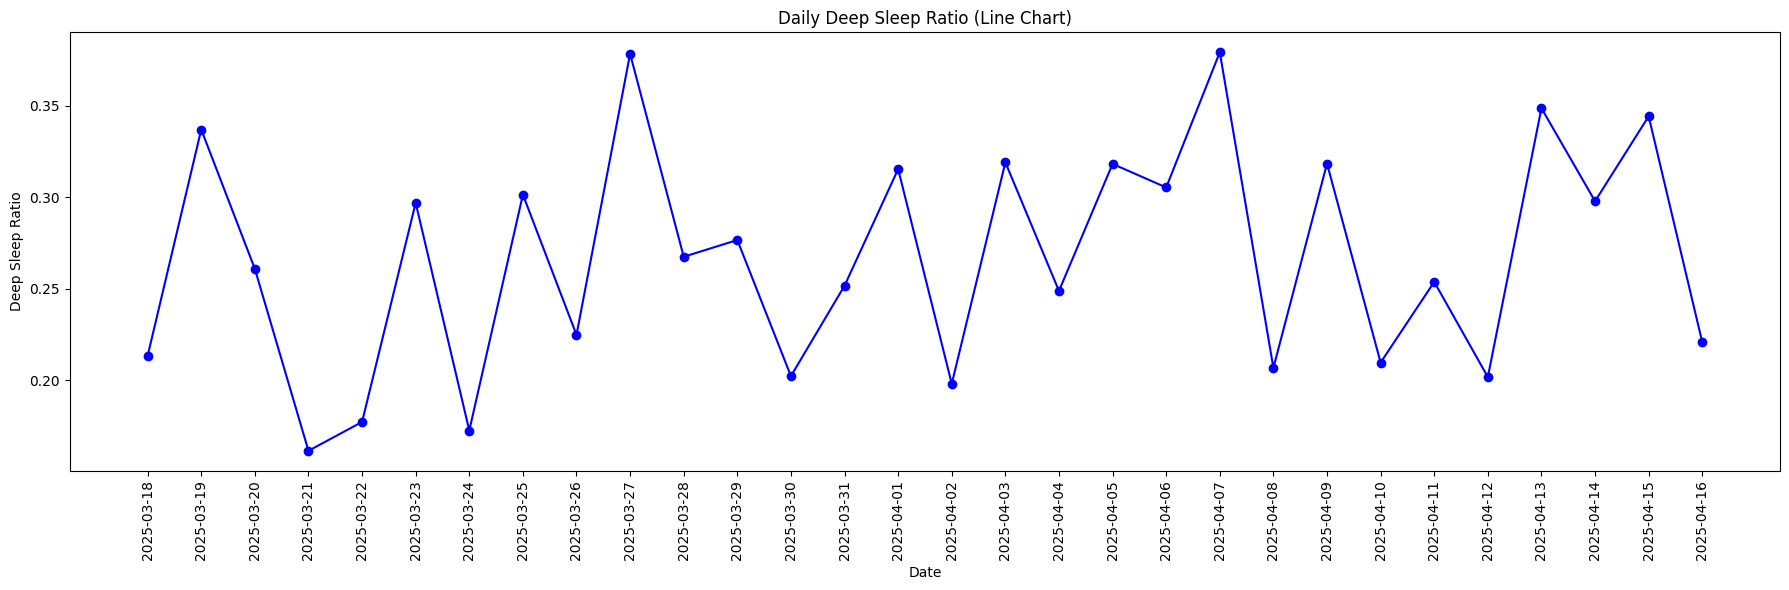

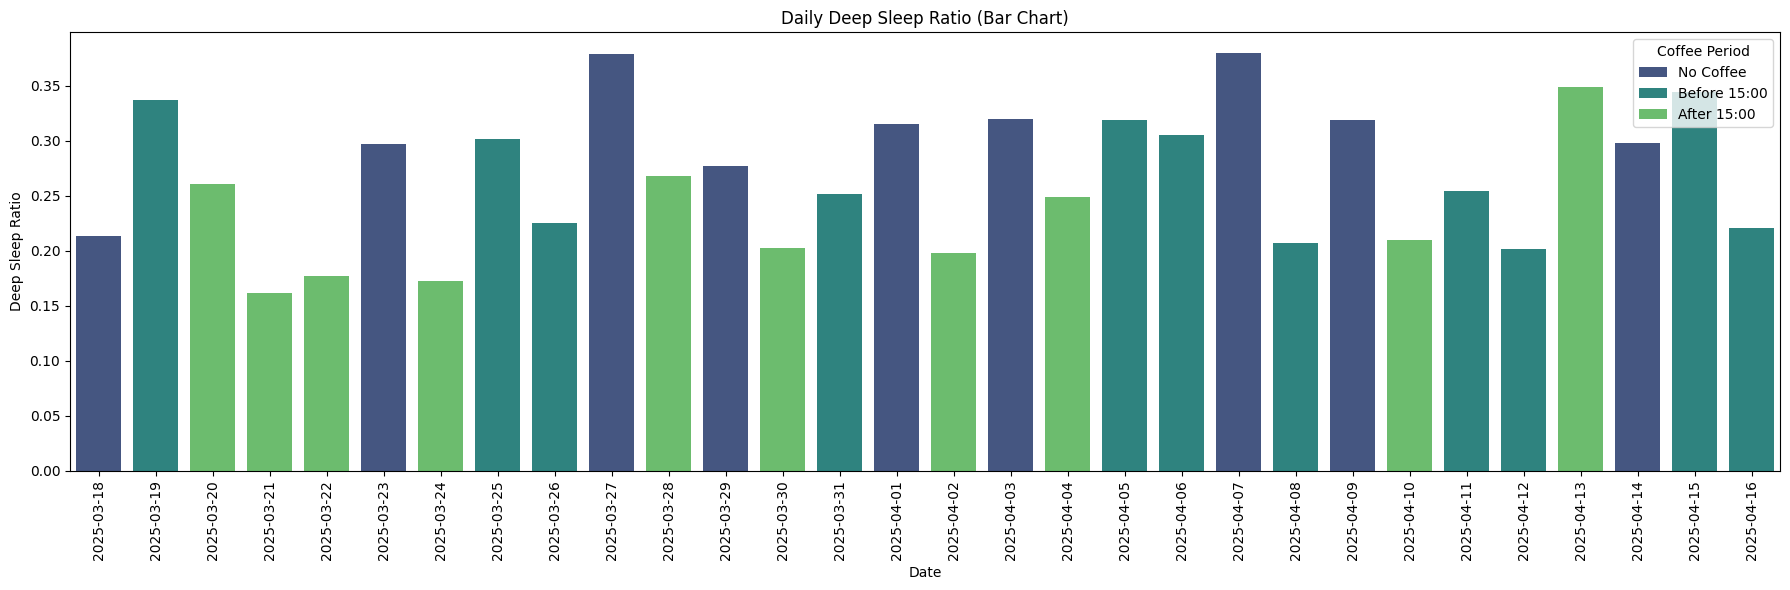

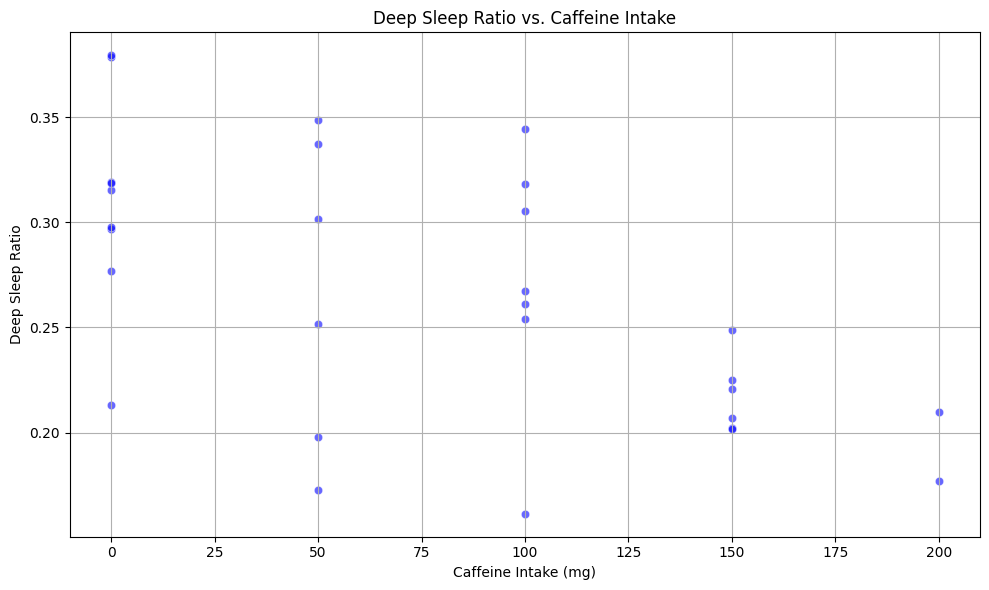

<ipython-input-4-55477f0c9dbc>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Coffee Period', y='Deep Sleep Ratio', data=coffee_data, palette="Set3")


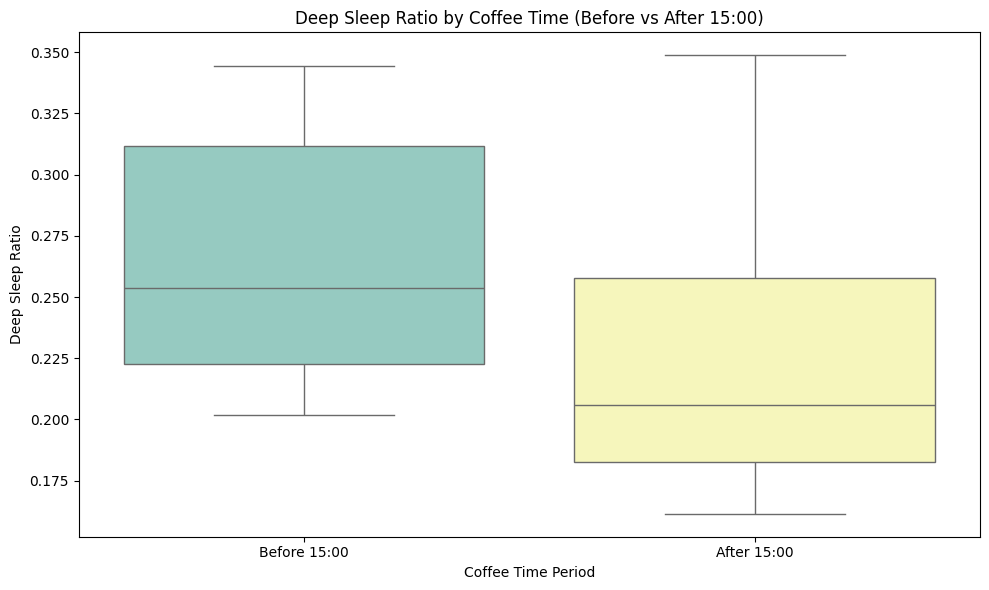

<ipython-input-4-55477f0c9dbc>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Coffee Consumed', y='Deep Sleep Ratio', data=df, palette="colorblind")


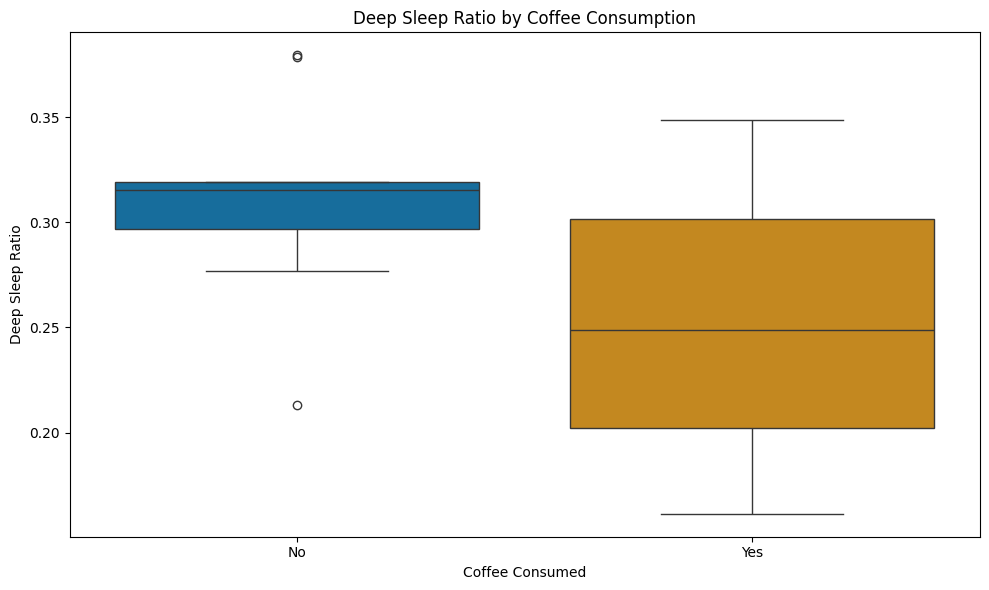

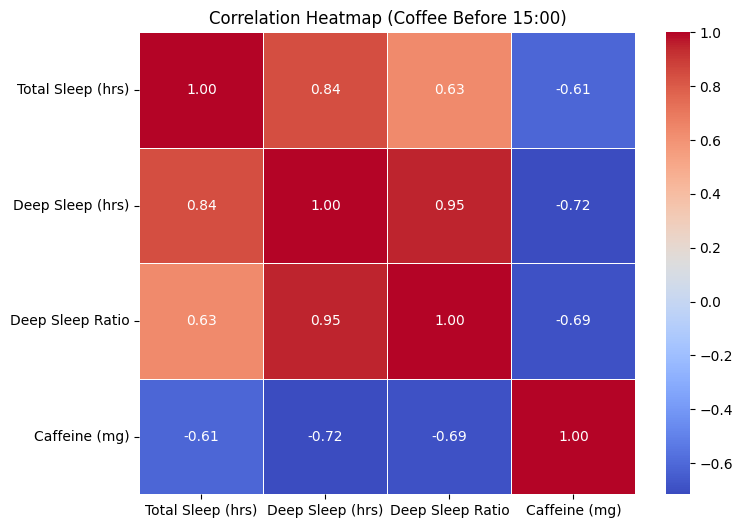

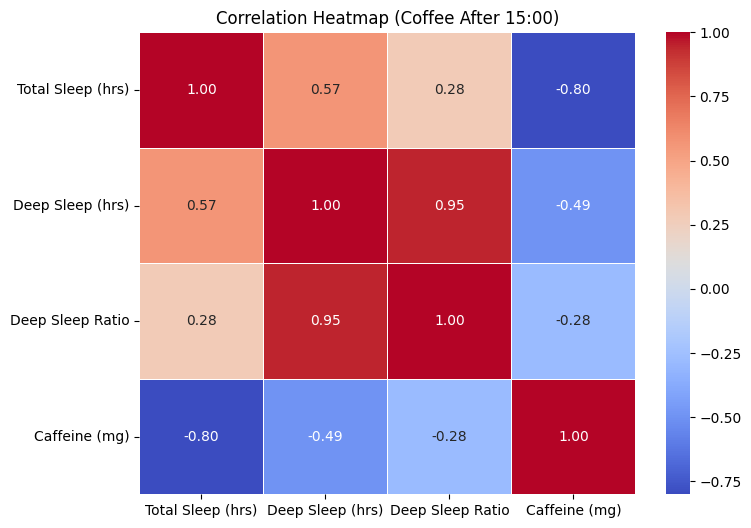

 Correlation: -0.585
 P-Value: 0.0007
 Significant relationship: Caffeine intake significantly affects deep sleep ratio.
 Before 15:00
 Correlation: -0.691
 P-Value: 0.0185
 Significant: Caffeine affects deep sleep (Before 15:00)
 After 15:00
 Correlation: -0.282
 P-Value: 0.4298
 Not significant (After 15:00)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


# read File
df = pd.read_excel("Caffeine_Sleep_Data.xlsx")
df['Date'] = pd.to_datetime(df['Date'])



# Line Chart:Daily Deep Sleep Ratio
plt.figure(figsize=(18, 6))
plt.plot(df['Date'].dt.strftime('%Y-%m-%d'), df['Deep Sleep Ratio'], marker='o', linestyle='-', color='blue')
plt.title('Daily Deep Sleep Ratio (Line Chart)')
plt.xlabel('Date')
plt.ylabel('Deep Sleep Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Bar Chart: Daily Deep Sleep Ratio
plt.figure(figsize=(18, 6))
sns.barplot(x='Date', y='Deep Sleep Ratio', hue='Coffee Period', data=df, palette='viridis')
plt.title('Daily Deep Sleep Ratio (Bar Chart)')
plt.xlabel('Date')
plt.ylabel('Deep Sleep Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Scatter plot: Caffeine Intake vs Deep Sleep Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Caffeine (mg)',
    y='Deep Sleep Ratio',
    data=df,
    alpha=0.6,
    color='blue'
)
plt.title("Deep Sleep Ratio vs. Caffeine Intake")
plt.xlabel("Caffeine Intake (mg)")
plt.ylabel("Deep Sleep Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()




coffee_data = df[df['Coffee Period'].isin(['Before 15:00', 'After 15:00'])]

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Coffee Period', y='Deep Sleep Ratio', data=coffee_data, palette="Set3")
plt.title("Deep Sleep Ratio by Coffee Time (Before vs After 15:00)")
plt.ylabel("Deep Sleep Ratio")
plt.xlabel("Coffee Time Period")
plt.tight_layout()
plt.show()



df['Coffee Consumed'] = df['Caffeine (mg)'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Boxplot: Coffee Consumed vs Coffee Not Consumed
plt.figure(figsize=(10, 6))
sns.boxplot(x='Coffee Consumed', y='Deep Sleep Ratio', data=df, palette="colorblind")
plt.title("Deep Sleep Ratio by Coffee Consumption")
plt.ylabel("Deep Sleep Ratio")
plt.xlabel("Coffee Consumed")
plt.tight_layout()
plt.show()

#Correlation Analysis

# Filter: Coffee Before 15:00
before_df = coffee_data[coffee_data['Coffee Period'] == 'Before 15:00']

# Correlation matrix
correlation_matrix_before = before_df[['Total Sleep (hrs)', 'Deep Sleep (hrs)', 'Deep Sleep Ratio', 'Caffeine (mg)']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Coffee Before 15:00)")
plt.show()



# Filter: Coffee After 15:00
after_df = coffee_data[coffee_data['Coffee Period'] == 'After 15:00']

# Correlation matrix
correlation_matrix_after = after_df[['Total Sleep (hrs)', 'Deep Sleep (hrs)', 'Deep Sleep Ratio', 'Caffeine (mg)']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Coffee After 15:00)")
plt.show()


#Hypothesis Testing
df['Deep Sleep Ratio'] = df['Deep Sleep (hrs)'] / df['Total Sleep (hrs)']
correlation, p_value = pearsonr(df['Caffeine (mg)'], df['Deep Sleep Ratio'])
print(" Correlation:", round(correlation, 3))
print(" P-Value:", round(p_value, 4))
if p_value < 0.05:
    print(" Significant relationship: Caffeine intake significantly affects deep sleep ratio.")
else:
    print(" No significant relationship: Caffeine intake does not significantly affect deep sleep ratio.")





# BEFORE 15:00
before = coffee_data[coffee_data['Coffee Period'] == 'Before 15:00']
corr_before, p_before = pearsonr(before['Caffeine (mg)'], before['Deep Sleep Ratio'])

print(" Before 15:00")
print(" Correlation:", round(corr_before, 3))
print(" P-Value:", round(p_before, 4))
if p_before < 0.05:
    print(" Significant: Caffeine affects deep sleep (Before 15:00)")
else:
    print(" Not significant (Before 15:00)")

# AFTER 15:00
after = coffee_data[coffee_data['Coffee Period'] == 'After 15:00']
corr_after, p_after = pearsonr(after['Caffeine (mg)'], after['Deep Sleep Ratio'])

print(" After 15:00")
print(" Correlation:", round(corr_after, 3))
print(" P-Value:", round(p_after, 4))
if p_after < 0.05:
    print(" Significant: Caffeine affects deep sleep (After 15:00)")
else:
    print(" Not significant (After 15:00)")